# MODULO 3: ANALISIS EXPLORATORIO DE DATOS
### Autor: Guillermo Alfonso Muñiz Hermosillo
### Matricula: A01793101
### Curso: Ciencia y Analitica de Datos
<h1><center>PROGRESO DEL CURSO:</center></h1>
<img src='./imagenes/A01793101_ProgresoMod3.png'>

<h1><center>GRADED REVIEW QUESTIONS:</center></h1>
<img src='./imagenes/A01793101_GradedReviewQuestionsMod3.png'>

In [44]:
import pandas as pd
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
# Debido a que nuestro conjunto de datos no contiene un encabezado, necesitamos especificarlo en el metodo read_csv()
df = pd.read_csv(url, header=None)
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horse-power", "peak-rpm", "city-mpg", "highway-mpg", "price"]
df.columns = headers


df['normalized-losses'].replace('?', np.nan, inplace=True)
# Convertimos a Flotante la columna Normalized-losses
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'])
media = df['normalized-losses'].mean()
df['normalized-losses'].replace(np.nan, media, inplace=True)
df['city-L/100km'] = 235/df['city-mpg']
df['price'].replace('?', np.nan, inplace=True)
df.dropna(subset=['price'], axis=0, inplace=True)
df['price'] = df['price'].astype('float')


df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horse-power,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,11.190476
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,11.190476
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,12.368421
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,9.791667
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,13.055556


## ANALISIS EXPLORATORION DE DATOS (EDA)
Es una tecnica para el analisis de datos con el objetivo de:

- Resumir caracteristicas principales de los datos.
- Obtener mejor conocimiento del dataset.
- Descubrir las relaciones entre las variables.
- Extraer variables importantes para el problema que queremos resolver.



Cuales son las caracteristicas que tienen mas impacto en el precio de un automovil?

### ESTADISTICAS DESCRIPTIVAS
Antes de analizar tus datos es util obtener informacion resumida de las caracteristicas de nuestros datos.

In [5]:
# Describe() - Resume estadisticas matematicas de nuestro conjunto de datos.
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,city-L/100km
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220,13207.129353,9.949525
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443,7947.066342,2.573104
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000,4.795918
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000,7775.000000,7.833333
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000,9.791667
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000,16500.000000,12.368421
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000,18.076923


In [17]:
# Value_Counts() - Resume los datos categoricos de nuestro conjunto de datos,
drive_wheels_counts = pd.DataFrame(df["drive-wheels"].value_counts())
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'},inplace=True)
drive_wheels_counts.index.name='drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,120
rwd,76
4wd,9


<AxesSubplot: xlabel='drive-wheels', ylabel='price'>

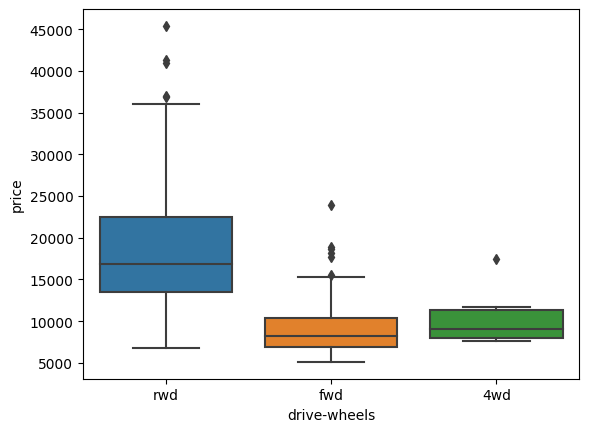

In [18]:
# Box Plots - Nos muestra de manera grafica informacion estadistica de nuestro conjunto de datos.
import seaborn as sns
sns.boxplot(x = 'drive-wheels', y='price', data=df)

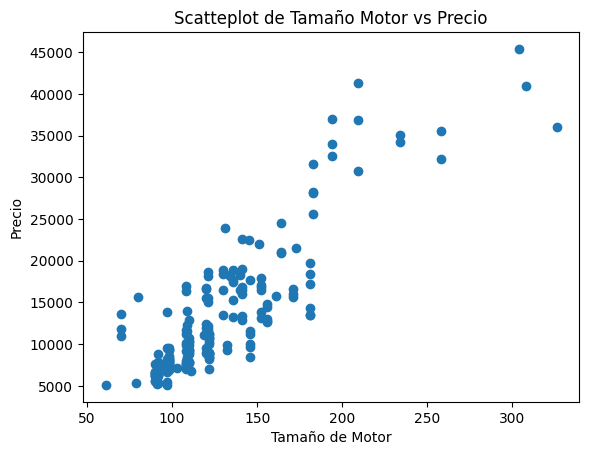

In [19]:
# Scatter Plot -  Representa nuestra informacion distribuida en un rango. Cada punto representa una observacion
import matplotlib.pyplot as plt

x=df['engine-size'] 
y=df['price']
plt.scatter(x,y)

plt.title('Scatteplot de Tamaño Motor vs Precio')
plt.xlabel('Tamaño de Motor')
plt.ylabel('Precio')

plt.show()


### GROUP BY EN PYTHON
Nos ayuda a agrupar todos nuestros datos de acuerdo a sus caracteristicas particulares.

En python el metodo grupo by puede ser utilizado en variables categoricas, en variables singulares o en multiples.

In [20]:
df_test = df[['drive-wheels', 'body-style', 'price']]

df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [23]:
# Metodo Pivote - Una variable mostrada entre las columnas y otra en las filas
df_pivot = df_grp.pivot(index='drive-wheels', columns='body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

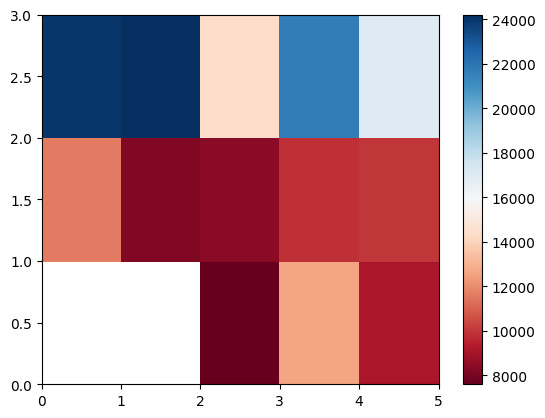

In [24]:
# Heatmap - Nos ayuda a mostrar una cuadricula con nuestros datos y le asigna un color basado en la intencidad de la relacion con otra variable.
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

### ANALISIS DE VARIANZA (ANOVA)
ANOVA nos ayuda a encontrar la correlacion entre diferentes grupos de una variable categorica.

Mediante este metodo obtendremos 2 resultados:

- F-test score: Variacion entre la media del grupo de muestra dividido por la variacion en dicho grupo de muestra.
- p-value: Grado de confianza

In [26]:
from scipy.stats import f_oneway
df_anova = df[['make', 'price']]
grouped_anova = df_anova.groupby(['make'])

anova_results_1 = f_oneway(grouped_anova.get_group('honda')['price'], grouped_anova.get_group('subaru')['price'])
anova_results_1

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

In [27]:
anova_results_2 = f_oneway(grouped_anova.get_group('honda')['price'], grouped_anova.get_group('jaguar')['price'])
anova_results_2

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

**Como se puede observar, si el F Score es alto y el pvalue es pequeño la correlacion entre una variable categorica y otras variables es fuerte**

### CORELACION
Es una metrica estadistica usada para medir hasta que punto variables diferentes son interdependientes entre ellas. Es decir, que si observamos dichas variables a traves del tiempo si una cam bia su valor como afecta a la otra.

(0.0, 53134.37586514533)

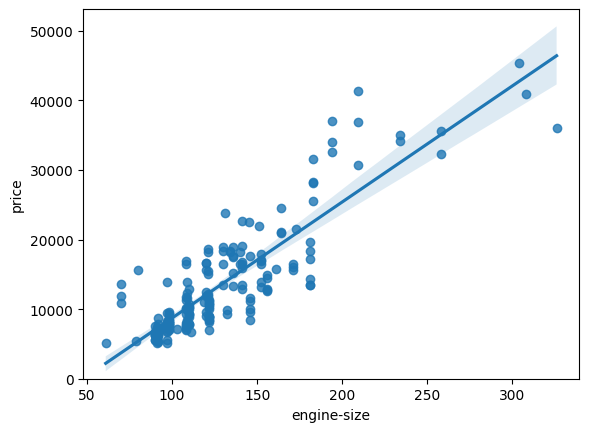

In [29]:
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

En la grafica anterior observamos las variables tamaño de motor y precio en un grafico de regresion. 
Como podemos observar la linea recta atravieza las observaciones de una manera ascndente por lo que podemos concluir que se tiene una relacion linear positiva entre estas dos variables.

Si el tamaño de motor aumente, el precio tambien aumenta.

(0.0, 48161.80653933995)

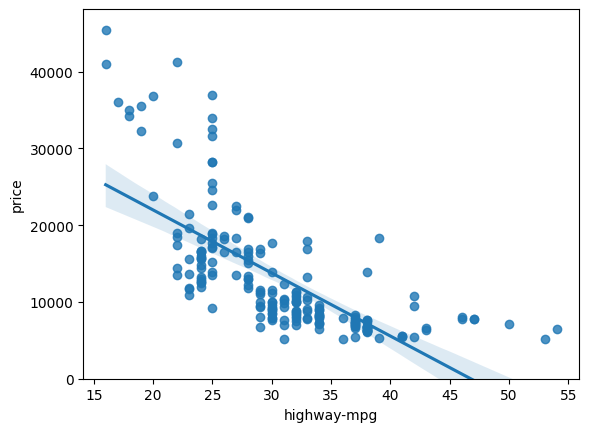

In [30]:
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

Al contrario del ejemplo anterior. Observamos una pendiente negativa. Es decir cuando el la variable millas por galon aumenta el precio disminuye.
Por lo tanto esto es una relacion linear negativa.

### ESTADISTICAS DE CORRELACION
#### Correlacion de Pearson: Mide la estabilidad de la correlacion entre 2 caracteristicas obteniendo 2 valores:

- Coeficiente de correlacion:
    - Cercano a +1: Relacion Positiva grande.
    - Cercano a -1: Relacion Negativa Grande.
    - Cercano a 0: No hay relacion.
- P-value:
    - Menor a 0.001: Gran certeza en el resultado.
    - Menor a 0.05: Certeza moderada en el resultado.
    - Menor a 0.1: Certeza debil en el resultado.
    - Mayor a 0.1: Sin certeza en el resultado.
    
Podemos por lo tanto decir que existe una correlacion fuerte cuando el **coeficinete de correlacion** es cercano a 1 o -1 y el **P-value** es menor a 0.001

In [45]:
df['horse-power'].replace('?', np.nan, inplace=True)
df['horse-power'] = pd.to_numeric(df['horse-power'])
mediahp = df['horse-power'].mean()
df['horse-power'].replace(np.nan, mediahp, inplace=True)
# df['price'].isna().sum()

0

In [46]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['horse-power'], df['price'])
print(pearson_coef)
print(p_value)

0.8096811975632288
6.058444649710002e-48


Como podemos observar la correlacion es cercana a +1 y el P-value es muy pequeño por lo que podemos conluir una correlacion fuerte entre los caballos de fuerza y el precio